## **_Essential Libraries_**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## **_Load Data_**

In [3]:
df = pd.read_csv(r'googleplaystore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### **_Some Columns are specified as objects (ex. Price, Installs) while they are numeric values. This indicates the presence of outlier values_**

In [5]:
df.describe() # The max value is an outlier, since that there is no  true rating that is above 5

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
df.isna().sum() # There are some values that contain missing values.

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
df.duplicated().sum()

483

In [8]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

- ### **There is an outlier value in the column with the value of (Everyone) when the column must be all numeric values**

In [9]:
df['Type'].loc[df['Price'] == 'Everyone'] # This row seems to be falsely indexed in many columns,

10472    0
Name: Type, dtype: object

### **There are a few possible approches to solve this problem:**
- By Manually reordering the data in it's right position
- By Removing the whole row
- By Imputing each column with the mean of the data and count the miss inputed data as outliers

#### **_One picks the suitable approach based on ones business_**

In [10]:
df.loc[df['Price'] == 'Everyone']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
# I am Choosing the First Option, since the is only one miss-entryed row, to ensure the 

df['Android Ver'].iloc[10472] = df['Current Ver'].iloc[10472]
df['Current Ver'].iloc[10472] = df['Last Updated'].iloc[10472]
df['Last Updated'].iloc[10472] = df['Genres'].iloc[10472]
df['Genres'].iloc[10472] = df['Content Rating'].iloc[10472]
df['Content Rating'].iloc[10472] = df['Price'].iloc[10472]
df['Price'].iloc[10472] = df['Type'].iloc[10472]
df['Type'].iloc[10472] = df['Installs'].iloc[10472]
df['Installs'].iloc[10472] = df['Size'].iloc[10472]
df['Size'].iloc[10472] = df['Reviews'].iloc[10472]
df['Reviews'].iloc[10472] = df['Rating'].iloc[10472]
df['Rating'].iloc[10472] = df['Category'].iloc[10472]
df['Category'].iloc[10472] = df['Category'].mode()[0]

In [12]:
df.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                           FAMILY
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [13]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [14]:
df.Rating = df.Rating.astype(float)

## **_Fixing the Rating Column_**

In [15]:
df['Rating'].value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
1.9      14
2.2      14
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

<Axes: xlabel='Rating', ylabel='Count'>

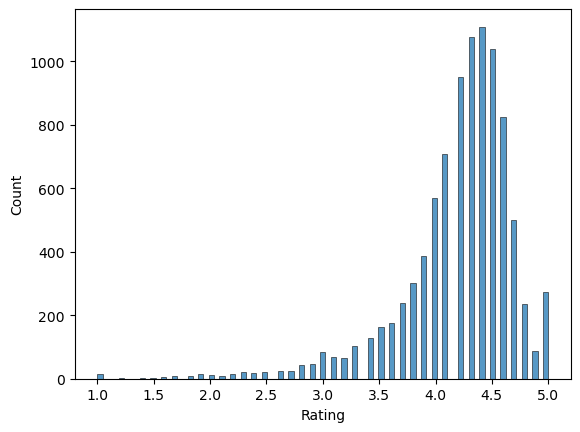

In [16]:
sns.histplot(df['Rating'])

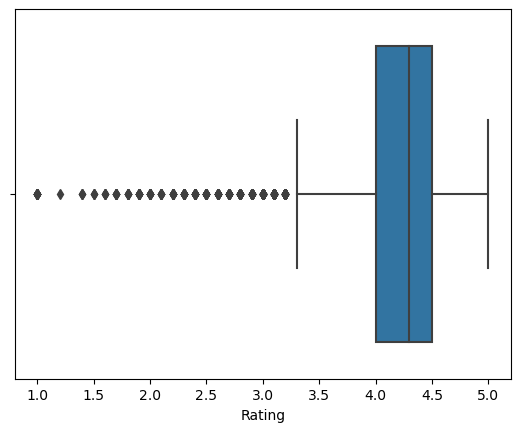

In [17]:
sns.boxplot(data=df,x='Rating')
plt.show()

### **There is an extreme outlier, and the lower outliers are within the normal range of data so it's ok to keep them**

In [18]:
# Since there are outliers in this column it's safer to impute the missing and outlier values using the median, since it's less sensitive to outliers

print(f'The Number of missing values in the Rating column: {df.Rating.isna().sum()}')

rating_median =  df.Rating.median()
print(f'The median Rating value: {rating_median}')

rating_mean = df.Rating.mean()
print(f'The mean Rating value: {rating_mean}') # The mean is close to the median so it doesn't matter much which to choose (not regarding the business need)

df.Rating.fillna(value=df.Rating.median(),inplace=True)

print(f'The Number of missing values in the Rating clolumn: {df.Rating.isna().sum()}')


The Number of missing values in the Rating column: 1474
The median Rating value: 4.3
The mean Rating value: 4.191512757553112
The Number of missing values in the Rating clolumn: 0


##### **Although the mean in this context is not far of the median it's not always the case so it's up to trial to figure out which is better**

##  **_Handeling the Rating outliers_** 

In [19]:
upper_limit = 5
lower_limit = 0

df.loc[(df['Rating'] > upper_limit) | (df['Rating'] < lower_limit), 'Rating'] = rating_median


In [20]:
df.Rating.value_counts().head() # There are no more outliers

4.3    2550
4.4    1109
4.5    1038
4.2     952
4.6     823
Name: Rating, dtype: int64

<Axes: xlabel='Rating', ylabel='Count'>

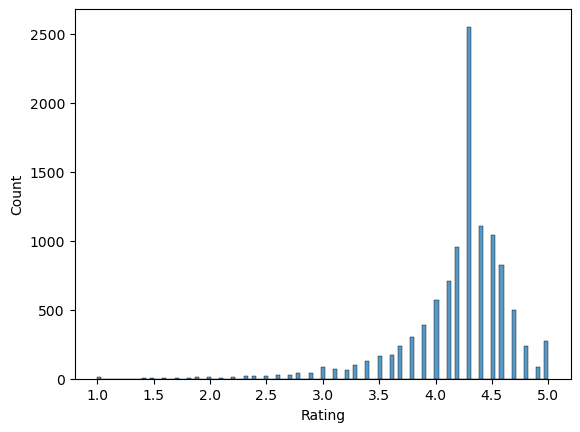

In [21]:
sns.histplot(df['Rating'])

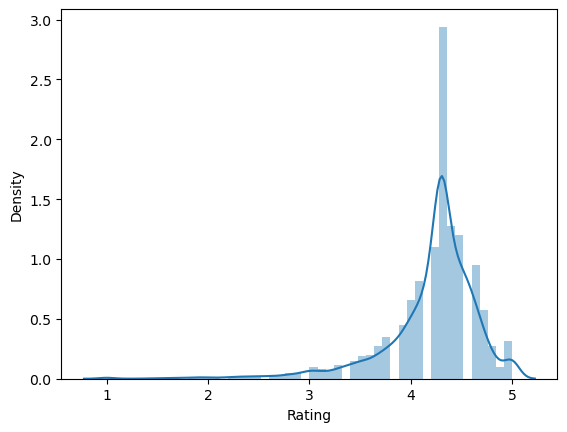

In [22]:
sns.distplot(df['Rating'])
plt.show()

### **_The Data seams to be left skewed but in the acceptable normal range of data, so It might not need handling_**

##  **_Fixing the Size Column_**

In [23]:
df.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [24]:
df.tail(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10821,Poop FR,FAMILY,4.3,6,2.5M,50+,Free,0,Everyone,Entertainment,"May 29, 2018",1.0,4.0.3 and up
10822,PLMGSS FR,PRODUCTIVITY,4.3,0,3.1M,10+,Free,0,Everyone,Productivity,"December 1, 2017",1,4.4 and up
10823,List iptv FR,VIDEO_PLAYERS,4.3,1,2.9M,100+,Free,0,Everyone,Video Players & Editors,"April 22, 2018",1.0,4.0.3 and up
10824,Cardio-FR,MEDICAL,4.3,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,4.3,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10828,Manga-FR - Anime Vostfr,COMICS,3.4,291,13M,"10,000+",Free,0,Everyone,Comics,"May 15, 2017",2.0.1,4.0 and up
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7.4M,"10,000+",Free,0,Everyone,Books & Reference,"June 19, 2016",2.96,4.1 and up
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.3M,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up


In [25]:
df[df['App'].duplicated()].head(10) # There seems to be no actual row duplicates

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
265,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
266,Zenefits,BUSINESS,4.2,296,14M,"50,000+",Free,0,Everyone,Business,"June 15, 2018",3.2.1,4.1 and up
267,Google Ads,BUSINESS,4.3,29313,20M,"5,000,000+",Free,0,Everyone,Business,"July 30, 2018",1.12.0,4.0.3 and up
268,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
269,Slack,BUSINESS,4.4,51507,Varies with device,"5,000,000+",Free,0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device


In [26]:
df['Size'].value_counts().head(30) # We Will treat the (varies with the device) as null values

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
Name: Size, dtype: int64

In [27]:
df.head(30)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [28]:
df.Size.isna().sum()

0

In [29]:
def fix_size(series):
    sizes = ['K','M','G'] # A List of possible application sizes
    for i in range(0,len(series)):
        item = series[i]
        if item[-1].upper() in sizes: # Ensuring there will be no miss input in the size by using the .upper method
            index = sizes.index(item[-1].upper())
            series[i] = item.replace(item[-1], ('0' * (3 * (index+1))))
        if '.' in item: # Removing the [.] from the rows
            series[i] = series[i].replace('.','')
        elif item == 'Varies with device': # Turning the Value (varies with device) into a NaN Value
            series[i] = np.nan


In [30]:
fix_size(df['Size'])
df['Size']

0        19000000
1        14000000
2        87000000
3        25000000
4        28000000
           ...   
10836    53000000
10837    36000000
10838    95000000
10839         NaN
10840    19000000
Name: Size, Length: 10841, dtype: object

In [31]:
df.head(30)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,56000000,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000000,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000000,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000000,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,31000000,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [32]:
df['Size'].value_counts()

12000000    237
15000000    232
14000000    231
11000000    230
13000000    226
           ... 
430000        1
429000        1
200000        1
460000        1
619000        1
Name: Size, Length: 369, dtype: int64

In [33]:
df.Size.dtype

dtype('O')

In [34]:
df['Size'] = pd.to_numeric(df['Size'],errors='coerce')

In [35]:
df.Size.dtype

dtype('float64')

In [36]:
df.Size.value_counts()

12000000.0    237
15000000.0    232
14000000.0    231
11000000.0    230
13000000.0    226
             ... 
430000.0        1
429000.0        1
200000.0        1
460000.0        1
619000.0        1
Name: Size, Length: 369, dtype: int64

In [37]:
df.Size.isna().sum()

1695

In [38]:
df['Size'].mean()

38966995.29849114

In [39]:
df.Size.fillna(value=df['Size'].mean(),inplace=True)

In [40]:
df['Size'] = df.Size.round(2)

In [41]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,36000000.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,95000000.0,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,38966995.3,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [42]:
df.Size.value_counts()

38966995.3    1695
12000000.0     237
15000000.0     232
14000000.0     231
11000000.0     230
              ... 
430000.0         1
429000.0         1
200000.0         1
460000.0         1
619000.0         1
Name: Size, Length: 370, dtype: int64

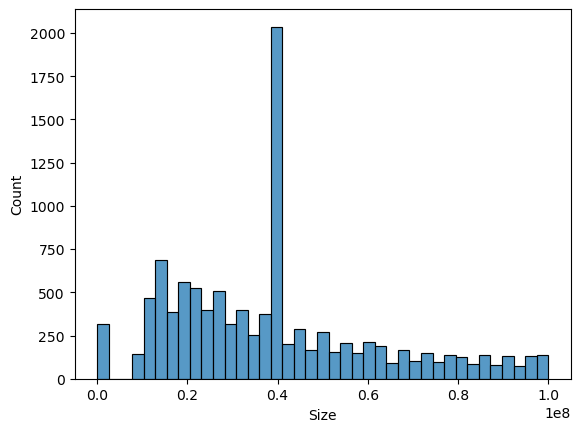

In [43]:
sns.histplot(df['Size'])
plt.show()

### **_The Data seems to be centered due to filling the null values with the average size_**

## **_Fixing The Price Column_**

In [44]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [45]:
df['Price'] = df['Price'].apply(lambda x: float(x.replace('$','')) ) 

<Axes: >

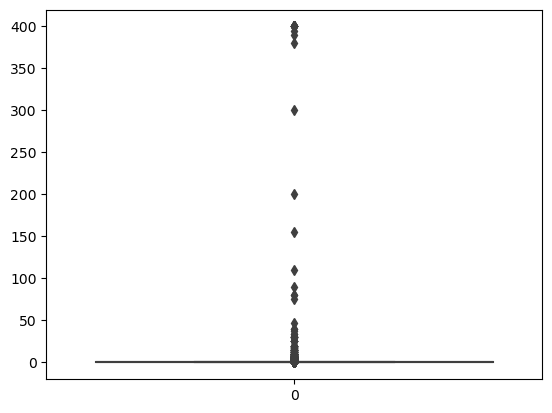

In [46]:
sns.boxplot(df['Price'])

- ### In the graph below we notice that rating slightly affects the price of the application

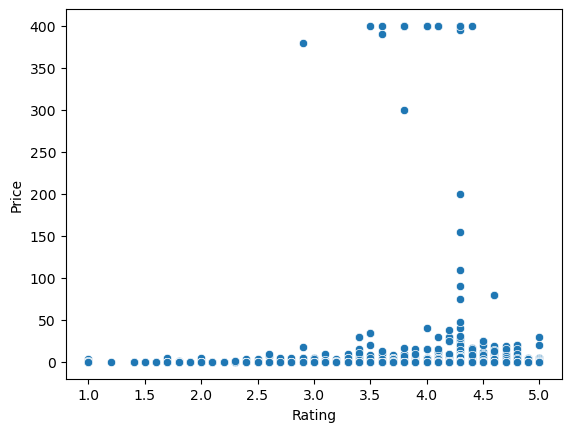

In [47]:
sns.scatterplot(y=df['Price'],x=df['Rating']) 
plt.show()

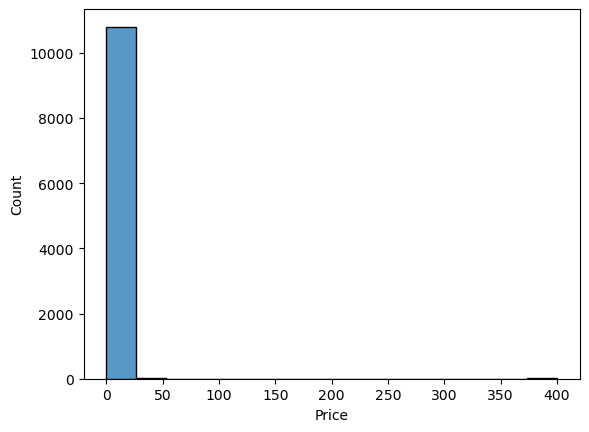

In [48]:
sns.histplot(data=df,x='Price')
plt.show() ## This is a normal State in the data since most of the applications are free

- ### **And Now the Price column is fixed** 

## **_Fixing The Category Column_**

In [49]:
df['Category'].unique() # There seems to be no outlier values

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [50]:
df['Category'].isna().sum() # There are no NaN Values

0

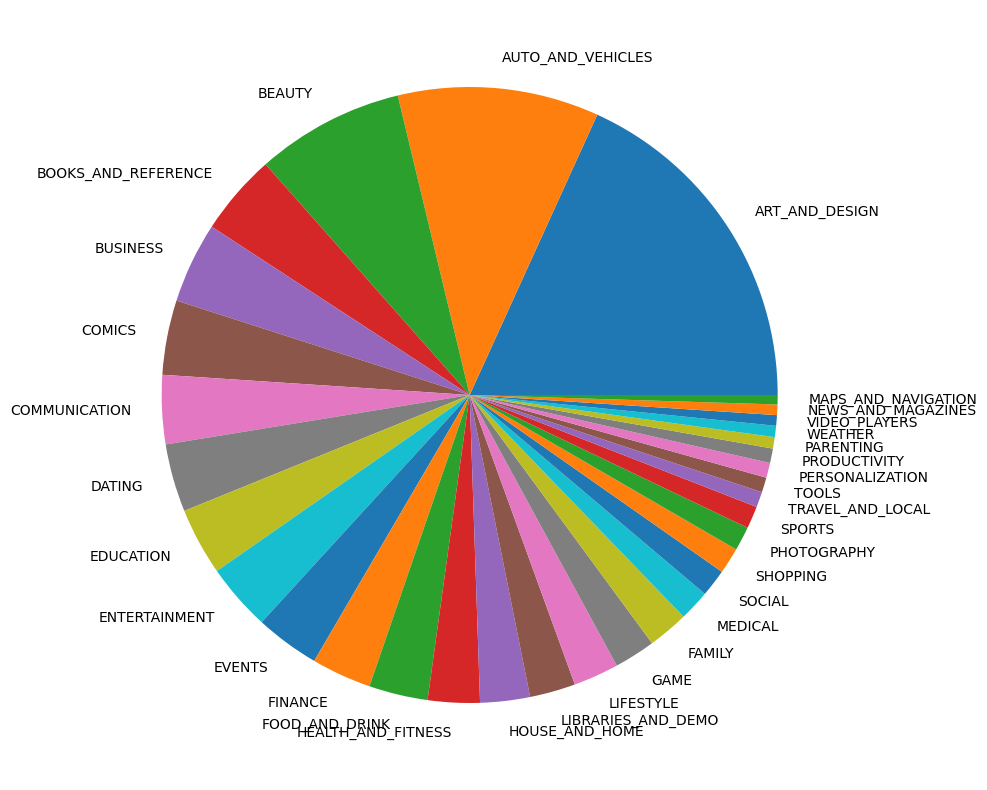

In [51]:
plt.figure(figsize=(10,10))
plt.pie(df['Category'].value_counts(),labels=df['Category'].unique())
plt.show()

- ### **_ART_AND_DESIGN is the most dominant category in the data field_**

- ### There is no need for fixing the Category Column

## **_Fixing The Android Version Column_**

In [52]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [53]:
df['Android Ver'].loc[df['Android Ver'] == '4.4W and up']

1024     4.4W and up
1089     4.4W and up
2254     4.4W and up
2289     4.4W and up
2395     4.4W and up
5970     4.4W and up
6365     4.4W and up
6377     4.4W and up
6444     4.4W and up
8288     4.4W and up
9515     4.4W and up
10811    4.4W and up
Name: Android Ver, dtype: object

In [54]:
df['Android Ver'].value_counts() 

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1376
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [55]:
df['Android Ver'].isna().sum()

2

In [56]:
df['Android Ver'] = df['Android Ver'].fillna(value=df['Android Ver'].mode()[0])


In [57]:
df['Android Ver'].isna().sum() #Removed the Nan Values

0

- ### **_Creating two new columns to represent the starting accepted android version and the ending acceptable version_**

In [58]:
df['Start Android Ver'] = df['Android Ver'].apply(lambda x : x.split(' and ')[0])
df['End Android Ver'] = df['Android Ver'].apply(lambda x : x.split(' and ')[-1])

df['Start Android Ver'] = df['Start Android Ver'].apply(lambda x : x.split(' - ')[0])
df['End Android Ver'] = df['End Android Ver'].apply(lambda x : x.split(' - ')[-1])


In [59]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Start Android Ver,End Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,4.0.3,up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,4.0.3,up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000000.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4.0.3,up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,4.2,up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000000.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4.4,up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,4.1,up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,36000000.0,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,4.1,up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,95000000.0,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,2.2,up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,38966995.3,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,Varies with device,Varies with device


In [60]:
df[['Start Android Ver', 'End Android Ver']].value_counts()

Start Android Ver   End Android Ver   
4.1                 up                    2453
4.0.3               up                    1501
4.0                 up                    1376
Varies with device  Varies with device    1362
4.4                 up                     980
2.3                 up                     652
5.0                 up                     601
4.2                 up                     394
2.3.3               up                     281
2.2                 up                     244
4.3                 up                     243
3.0                 up                     241
2.1                 up                     134
1.6                 up                     116
6.0                 up                      60
7.0                 up                      42
3.2                 up                      36
2.0                 up                      32
5.1                 up                      24
1.5                 up                      20
4.4W                u

In [61]:
df.drop(columns=['Android Ver'],inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Start Android Ver,End Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3,up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3,up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000000.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3,up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2,up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000000.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4,up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1,up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,36000000.0,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1,up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,95000000.0,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2,up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,38966995.3,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,Varies with device


In [62]:
df['Last Updated'] = pd.to_datetime(df['Last Updated']) # Formated the Last Updated column to a date time column to make easier to use the data

In [63]:
df['Last Updated'].dtype

dtype('<M8[ns]')

In [64]:
df.sort_values(by='Last Updated',ascending=True,ignore_index=True)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Start Android Ver,End Android Ver
0,FML F*ck my life + widget,FAMILY,4.2,1415,209000.0,"100,000+",Free,0.00,Everyone,Entertainment,2010-05-21,3.1,1.5,up
1,CJ Poker Odds Calculator,GAME,4.1,207,116000.0,"50,000+",Free,0.00,Everyone,Card,2011-01-30,1.2,1.6,up
2,FD Shift Calendar Widget,TOOLS,4.1,981,73000.0,"100,000+",Free,0.00,Everyone,Tools,2011-03-16,1.2.4,1.6,up
3,DEER HUNTER CHALLENGE,GAME,3.7,38767,41000000.0,"5,000,000+",Free,0.00,Everyone 10+,Action,2011-04-11,1.4.3,2.0,up
4,Freecell CY,GAME,4.0,387,11000000.0,"50,000+",Free,0.00,Everyone,Card,2011-04-16,1.3.3,1.6,up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Video Downloader For FB: Save FB Videos 2018,TOOLS,4.3,434,36000000.0,"50,000+",Free,0.00,Everyone,Tools,2018-08-08,1.1.9,4.0.3,up
10837,BankNordik,FINANCE,3.9,28,15000000.0,"5,000+",Free,0.00,Everyone,Finance,2018-08-08,7.3.2,5.0,up
10838,Shoot Hunter-Gun Killer,GAME,4.3,320334,27000000.0,"50,000,000+",Free,0.00,Teen,Action,2018-08-08,1.1.2,4.1,up
10839,Lalafo Pulsuz Elanlar,SHOPPING,4.4,61392,38966995.3,"1,000,000+",Free,0.00,Everyone,Shopping,2018-08-08,Varies with device,Varies with device,Varies with device


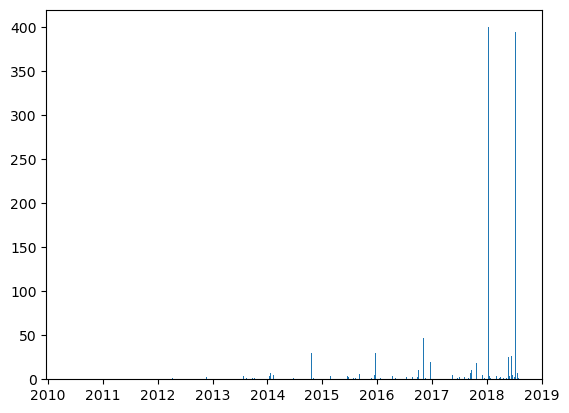

In [65]:
plt.bar(df['Last Updated'],df['Price'])
plt.show() # The Price rises as time progresses

## **_Handle Missing Values_**

In [66]:
df.isna().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Start Android Ver    0
End Android Ver      0
dtype: int64

In [67]:
df['Type'].value_counts() # The data is heavily biased towards the free costing applications

Free    10040
Paid      800
Name: Type, dtype: int64

In [68]:
df['Category'].value_counts()

FAMILY                 1973
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

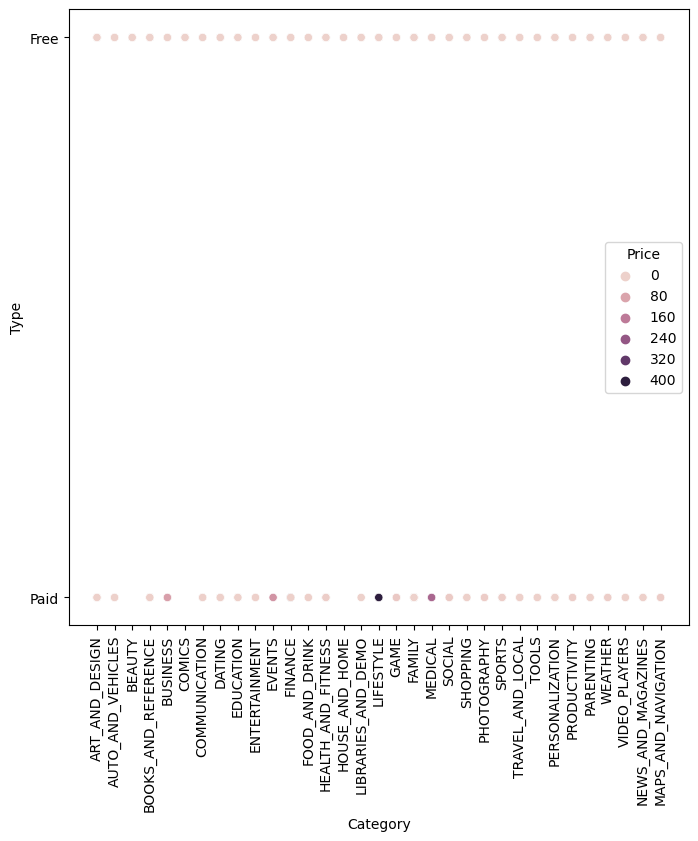

In [69]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Category',y='Type',hue='Price',data=df)
plt.xticks(rotation=90)
plt.show()

In [70]:
px.scatter_3d(x=df['Last Updated'],y=df['Category'],z=df['Price']) # As The time passes the prices rise and The most expensive Apps are in [Finance, Family, LifeStyle]

In [71]:
df['Type'].fillna(df['Type'].mode()[0],inplace=True)

In [72]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Start Android Ver,End Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000000.0,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000000.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,"5,000+",Free,0.0,Everyone,Education,2017-07-25,1.48,4.1,up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,36000000.0,100+,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1,up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,95000000.0,"1,000+",Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2,up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,38966995.3,"1,000+",Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,Varies with device


In [73]:
df.isna().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Start Android Ver    0
End Android Ver      0
dtype: int64

In [74]:
df['Genres'].fillna(value=df['Genres'].mode()[0],inplace=True)
df['Current Ver'].fillna(value=df['Current Ver'].mode()[0],inplace=True)

In [75]:
df.isna().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Start Android Ver    0
End Android Ver      0
dtype: int64

## **_Handling Outliers_**

- ### **_All of the following outlier values are caused by the imbalance of the type of the application (Free, Paid)_**

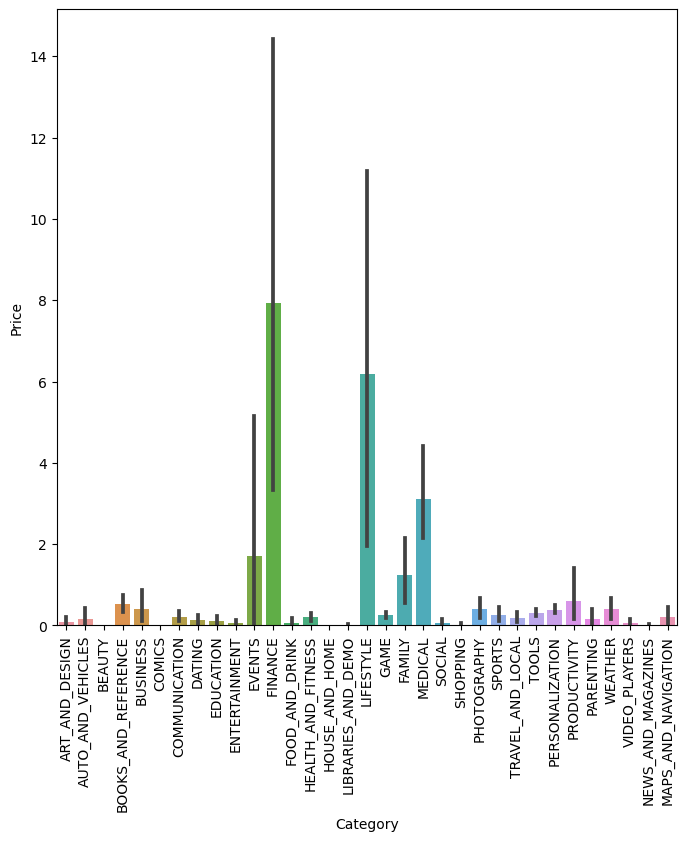

In [76]:
plt.figure(figsize=(8,8))
sns.barplot(data=df,x='Category',y='Price')
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='Price'>

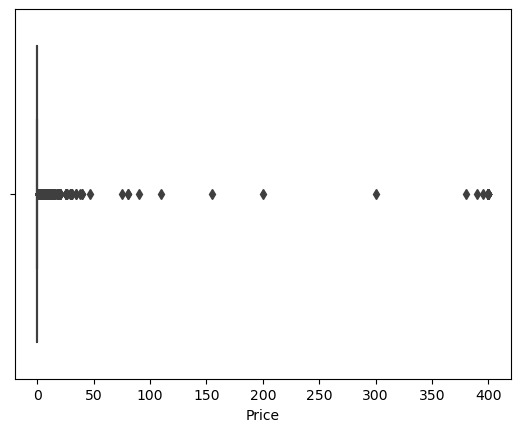

In [77]:
sns.boxplot(x=df['Price'])

In [78]:
df['Content Rating'].value_counts()

Everyone           8715
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [79]:
df.loc[df['Content Rating'] == 'Unrated', 'Content Rating'] = df['Content Rating'].mode()[0]

In [80]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Start Android Ver', 'End Android Ver'],
      dtype='object')

## **_Fixing The Installs Column_**

In [81]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',',''))

In [82]:
df['Installs'] = df['Installs'].apply(lambda x :int(x.replace('+','')))

In [83]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Start Android Ver,End Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1,up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,36000000.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1,up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,95000000.0,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2,up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,38966995.3,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,Varies with device


In [84]:
df['Reviews'] = df['Reviews'].astype(float)

In [85]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Start Android Ver,End Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,87000000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,28000000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1,up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,36000000.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1,up
10838,Parkinson Exercices FR,MEDICAL,4.3,3.0,95000000.0,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2,up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,38966995.3,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,Varies with device


In [86]:
df.dtypes

App                          object
Category                     object
Rating                      float64
Reviews                     float64
Size                        float64
Installs                      int64
Type                         object
Price                       float64
Content Rating               object
Genres                       object
Last Updated         datetime64[ns]
Current Ver                  object
Start Android Ver            object
End Android Ver              object
dtype: object

# **_Analytical Question:_**

### **_1. What is the most expensive app on the Play Store?_**

In [87]:
df['App'].loc[df['Price'] == 400].values[0]

"I'm Rich - Trump Edition"

In [88]:
price = df['Price'].max()
max_price_app_name = df['App'].loc[df['Price'] ==price].values[0]
print(f'The Most Expensive Application: ({max_price_app_name}) with a price of ${price}')

The Most Expensive Application: (I'm Rich - Trump Edition) with a price of $400.0


In [89]:
px.scatter(y=df['Price'],x=df['Category']) # The most expensive application is worth $400 and it's in the lifestyle Category


### **_2.	Which genre has the highest number of apps?_**

In [90]:
most_genre_apps = df['Genres'].value_counts().index[0]
print(f'The Genre with the highest number of apps: {most_genre_apps}')

The Genre with the highest number of apps: Tools


In [91]:
px.bar(x =df['Genres'].value_counts().index,y=df['Genres'].value_counts())

### **_3. What is the average size of free vs. paid apps?_**

In [92]:
group = df.groupby(by='Type').mean()

In [93]:
group_size = pd.DataFrame(group['Size'])

In [94]:
group_size.reset_index(drop=True,inplace=True)

In [95]:
display(group_size)
print(f'The avereage Size of Paid is: {group_size.iloc[0].values[0]} Byets, Free is {group_size.iloc[1].values[0]} Bytes')

,Size
0,3.922559e+07
1,3.572137e+07


The avereage Size of Paid is: 39225585.139996015 Byets, Free is 35721369.5535 Bytes


### **_4.	What are the top 5 most expensive apps with a perfect rating (5)?_**

In [96]:
df['Rating'].loc[df['Rating'] == 5.0].count() # There are 274 Apps with 5 Star Reviews

274

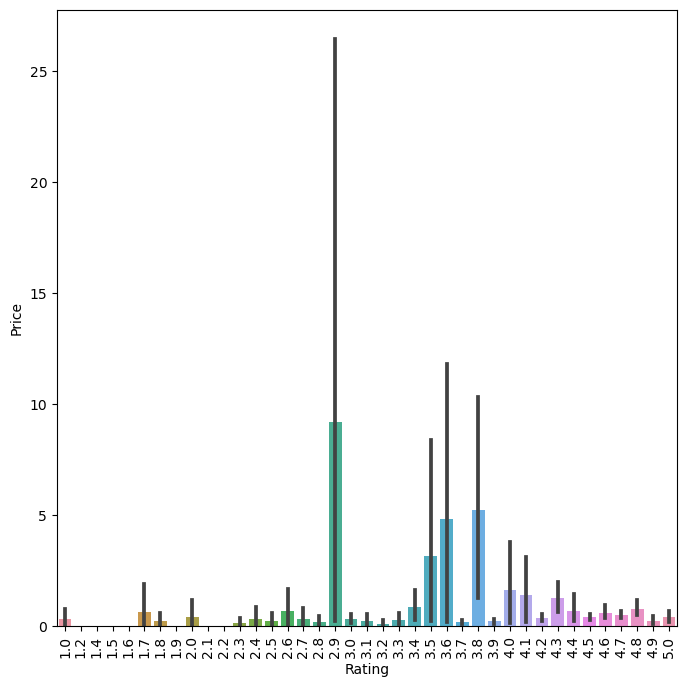

In [97]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['Rating'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Rating', ylabel='Count'>

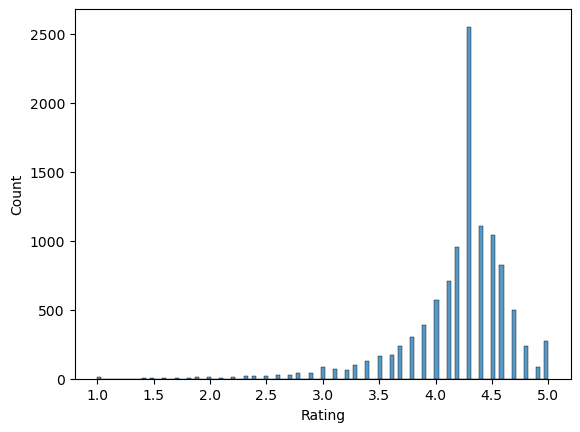

In [98]:
sns.histplot(df['Rating'])

In [99]:
paid_rating_5 = df[['App','Rating','Price']].loc[(df['Rating'] == 5) & (df['Price'] != 0)]
paid_rating_5

,App,Rating,Price
2262,Super Hearing Secret Voices Recorder PRO,5.0,2.99
2271,FHR 5-Tier 2.0,5.0,2.99
3957,ADS-B Driver,5.0,1.99
4452,P-Home for KLWP,5.0,0.99
4477,Android P Style Icon Pack,5.0,0.99
4988,Easy Hotspot Ad Free,5.0,0.99
5237,Hey AJ! It's Saturday!,5.0,3.99
5246,Hey AJ! It's Bedtime!,5.0,4.99
5260,AJ Gray Dark Icon Pack,5.0,0.99
5263,AJ Blue Icon Pack,5.0,0.99


In [100]:
paid_rating_5.sort_values(by='Price',ascending=False,inplace=True)

In [101]:
paid_rating_5

,App,Rating,Price
5489,AP Art History Flashcards,5.0,29.99
7477,USMLE Step 2 CK Flashcards,5.0,19.99
5482,meStudying: AP English Lit,5.0,4.99
7204,TI-84 CE Graphing Calculator Manual TI 84,5.0,4.99
5246,Hey AJ! It's Bedtime!,5.0,4.99
5237,Hey AJ! It's Saturday!,5.0,3.99
8287,AC DC Power Monitor,5.0,3.04
2271,FHR 5-Tier 2.0,5.0,2.99
2262,Super Hearing Secret Voices Recorder PRO,5.0,2.99
8014,Morse Player,5.0,1.99


In [102]:
top_5_expensive_5_star = paid_rating_5[['App','Price']].head(5)

In [103]:
top_5_expensive_5_star.reset_index(drop=True,inplace=True)
top_5_expensive_5_star

,App,Price
0,AP Art History Flashcards,29.99
1,USMLE Step 2 CK Flashcards,19.99
2,meStudying: AP English Lit,4.99
3,TI-84 CE Graphing Calculator Manual TI 84,4.99
4,Hey AJ! It's Bedtime!,4.99


In [104]:
for index, app in top_5_expensive_5_star.iterrows():
    print(f'The App in the position #{index+1}: {app.App}, with the price of ${app.Price}')

The App in the position #1: AP Art History Flashcards, with the price of $29.99
The App in the position #2: USMLE Step 2 CK Flashcards, with the price of $19.99
The App in the position #3: meStudying: AP English Lit, with the price of $4.99
The App in the position #4: TI-84 CE Graphing Calculator Manual TI 84, with the price of $4.99
The App in the position #5: Hey AJ! It's Bedtime!, with the price of $4.99


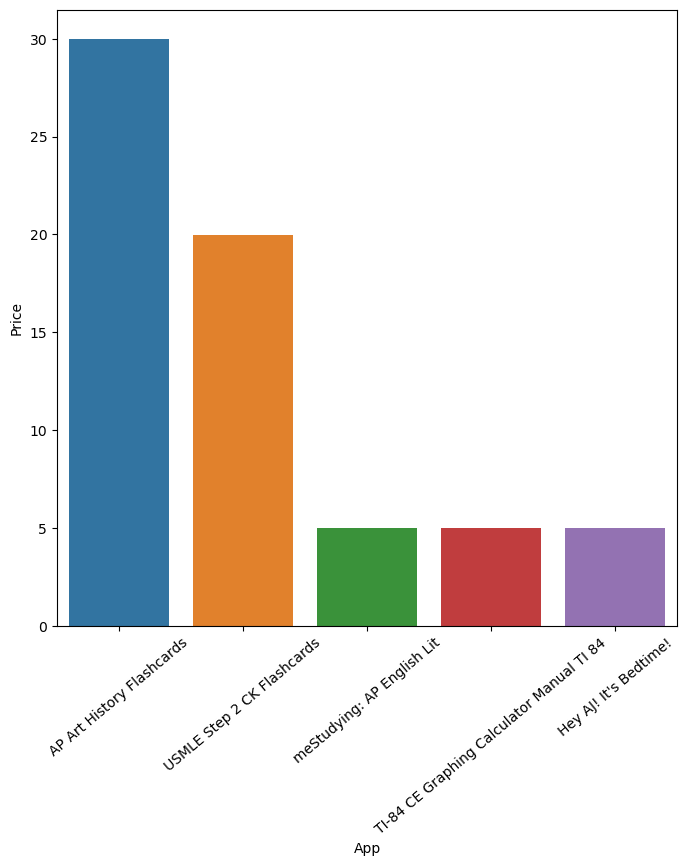

In [105]:
plt.figure(figsize=(8,8))
sns.barplot(x=top_5_expensive_5_star['App'],y=top_5_expensive_5_star['Price'])
plt.xticks(rotation=40)
plt.show()

### **_6.	What is the average price of apps, grouped by genre and number of installs?_**

In [106]:
df.Genres

0                     Art & Design
1        Art & Design;Pretend Play
2                     Art & Design
3                     Art & Design
4          Art & Design;Creativity
                   ...            
10836                    Education
10837                    Education
10838                      Medical
10839            Books & Reference
10840                    Lifestyle
Name: Genres, Length: 10841, dtype: object

In [107]:
avg_price_per_genre = df.groupby(by=['Genres','Installs'])['Price'].mean() # Done But lack the suitable plot design to use

In [108]:
avg_price_per_genre

Genres  Installs
Action  10          0.000000
        50          0.663333
        100         1.096000
        500         0.000000
        1000        0.372500
                      ...   
Word    100000      0.000000
        1000000     0.000000
        5000000     0.000000
        10000000    0.000000
        50000000    0.000000
Name: Price, Length: 921, dtype: float64

### **_7.	How many apps have a rating higher than 4.7, and what is their average price?_**

In [ ]:
avg_price_above_4_7_count = df[['App','Price']].loc[df['Rating']  > 4.7]['App'].count()

In [127]:
avg_price_above_4_7 = df[['App','Price']].loc[df['Rating']  > 4.7].mean()[0]

In [128]:
print(f'The number of apps above 4.7 Rating: {avg_price_above_4_7_count}, with an average of ${avg_price_above_4_7}')

The number of apps above 4.7 Rating: 595, with an average of $0.5018487394957983


### **_8.	What is Google's estimated revenue from apps with 5,000,000+ installs?_**

In [133]:
apps_above_5m = df.loc[df['Installs'] > 5000000]

In [134]:
apps_above_5m

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Start Android Ver,End Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,up
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829.0,20000000.0,10000000,Free,0.0,Teen,Art & Design,2018-04-02,3.8,4.1,up
19,ibis Paint X,ART_AND_DESIGN,4.6,224399.0,31000000.0,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,5.5.4,4.1,up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221.0,38966995.3,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,Varies with device,Varies with device,Varies with device
45,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,4.7,174531.0,24000000.0,10000000,Free,0.0,Everyone,Art & Design,2018-07-31,1.6.1,4.1,up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10729,MX Player Codec (ARMv7),LIBRARIES_AND_DEMO,4.3,332083.0,63000000.0,10000000,Free,0.0,Everyone,Libraries & Demo,2018-04-23,1.9.19,4.0,up
10740,PhotoFunia,PHOTOGRAPHY,4.3,316378.0,44000000.0,10000000,Free,0.0,Everyone,Photography,2017-06-03,4.0.7.0,2.3,up
10781,Modern Strike Online,GAME,4.3,834117.0,44000000.0,10000000,Free,0.0,Teen,Action,2018-07-30,1.25.4,4.1,up
10784,Big Hunter,GAME,4.3,245455.0,84000000.0,10000000,Free,0.0,Everyone 10+,Action,2018-05-31,2.8.6,4.0,up


In [149]:
apps_sales = (df['Price'].loc[df['Type'] == 'Paid'] * df['Installs'].loc[df['Type'] == 'Paid'])
apps_sales

234      499000.0
235      499000.0
290      499000.0
291      499000.0
427      399000.0
           ...   
10735        99.0
10760      7990.0
10782    169900.0
10785     12000.0
10798        52.0
Length: 800, dtype: float64

In [155]:
total_sales = apps_sales.sum()

In [156]:
print(f'The Total sales of playstore: {total_sales}')

The Total sales of playstore: 388629445.78999996


In [157]:
google_revenue = total_sales * 0.3
print(f'Google\'s Revenue: {google_revenue}')

Google's Revenue: 116588833.73699999


### **_9.	What are the maximum and minimum sizes of free vs. paid apps?_**

In [162]:
paid_free_grouped = pd.DataFrame(df.groupby(by='Type')['Size'].mean())

In [164]:
paid_free_grouped.reset_index(inplace=True)

In [165]:
paid_free_grouped

,Type,Size
0,Free,3.922559e+07
1,Paid,3.572137e+07


In [173]:
print(f'The Average Size for Free apps is: {paid_free_grouped.Size.iloc[0]} Bytes.')
print(f'The Average Size for Paid apps is: {paid_free_grouped.Size.iloc[1]} Bytes.')

The Average Size for Free apps is: 39225585.139996015 Bytes.
The Average Size for Paid apps is: 35721369.5535 Bytes.


In [186]:
px.pie(paid_free_grouped,values='Size',labels=df['Type'].unique(),names='Type')

- #### **_The Average Size of Free apps are larger than the Paid apps_**

### **_10.	Is there a correlation between an app’s rating, number of reviews, size, and its price?_**

In [177]:
correlation = df[['Rating','Reviews','Size','Price']].corr()
correlation # Their affect on the price is futile due to the huge bias of data towards the Free apps

,Rating,Reviews,Size,Price
Rating,1.000000,0.063166,0.036425,-0.019269
Reviews,0.063166,1.000000,0.069220,-0.009666
Size,0.036425,0.069220,1.000000,-0.010729
Price,-0.019269,-0.009666,-0.010729,1.000000


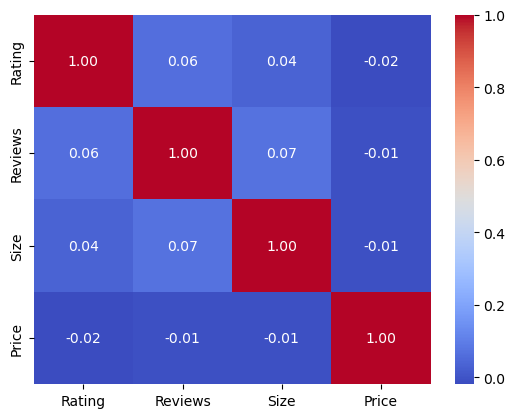

In [178]:
sns.heatmap(data=correlation,cmap='coolwarm',annot=True,fmt='.2f')
plt.show()

- #### **_Their affect on the price is futile due to the huge bias of data towards the Free apps_**

In [ ]:
df['Type'].value_counts()

Free    10041
Paid      800
Name: Type, dtype: int64

In [ ]:
df['Type'].value_counts()[0]/len(df) * 100 # The data is biased towards the free class by nearly 93 percent

92.62060695507795

In [ ]:
px.pie(data_frame=df['Type'].value_counts(),names=df['Type'].values)

### **_11.	How many apps exist for each type (free/paid) across different content ratings?_**

In [202]:
grouped = df.groupby(by=['Type','Content Rating'])[['App']].count()
grouped.reset_index(inplace=True)
grouped

,Type,Content Rating,App
0,Free,Adults only 18+,3
1,Free,Everyone,8022
2,Free,Everyone 10+,381
3,Free,Mature 17+,479
4,Free,Teen,1156
5,Paid,Everyone,695
6,Paid,Everyone 10+,33
7,Paid,Mature 17+,20
8,Paid,Teen,52


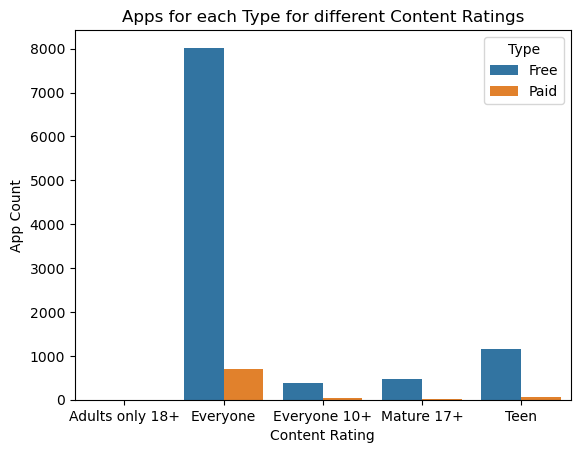

In [211]:
sns.barplot(data=grouped,x='Content Rating',y='App',hue='Type')
plt.title('Apps for each Type for different Content Ratings')
plt.ylabel('App Count')
plt.show()

- #### **_the everyone Content Rating is the dominant class in both Free and Paid Type_**

### **_12.	How many apps are compatible with Android version 4.x?_**

In [ ]:
compatible = df['App'].where((df[df['Start Android Ver'].startswith('4')]) | df['Start Android Ver'])

In [215]:
df['Start Android Ver']

0                     4.0.3
1                     4.0.3
2                     4.0.3
3                       4.2
4                       4.4
                ...        
10836                   4.1
10837                   4.1
10838                   2.2
10839    Varies with device
10840    Varies with device
Name: Start Android Ver, Length: 10841, dtype: object

In [280]:
def check_compatiblity(df):
    df_index = []
    for index, item in df[['Start Android Ver', 'End Android Ver']].iterrows():
        if item[0][0].isdigit():
            if item[0][0] == '4':
                df_index.append(index)
                continue
            if int(item[0][0]) < 4:
                if item[1] == 'up':
                    df_index.append(index)
                    continue
                if item[1][0].isdigit():
                    if int(item[1][0]) >= 4:
                        df_index.append(index)
                        continue
    return df_index

- #### **_This function accounts for the Android Versions that are allowed between the start and end threshold_** 

In [281]:
compatible = check_compatiblity(df).copy()

In [282]:
compatible_df = df.iloc[compatible]

In [290]:
num_compatible_apps = compatible_df.count()[0]

In [ ]:
print(f'There are {num_compatible_apps} Compatible apps for 4.x Android Version.')

There are 8738 Compatible apps for 4.x Android Version
